In [1]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Normal
import matplotlib.pyplot as plt
import sys
%matplotlib inline



In [8]:
!pwd

/Users/liam/cos435_project


In [9]:
import pandas as pd
train = pd.read_csv("/Users/liam/cos435_project/dataset/MathDial_map_back_4_actions.csv", sep="\t")
train

,misconception_type,convo_turn,done,previous_action_id,listen_to_feedback,problem_progress,progress_delta,correct_solution,next_action_hint_strength,next_action_id
0,1,1,0,0.0,0,0,0,0,1,1
1,1,2,0,21.0,1,25,25,0,1,1
2,1,3,1,36.0,1,100,75,1,1,3
3,3,1,0,0.0,0,0,0,0,1,1
4,3,2,0,21.0,1,75,75,0,2,1
...,...,...,...,...,...,...,...,...,...,...
12012,2,25,0,60.0,0,50,50,0,2,0
12013,2,26,0,2.0,1,50,0,0,2,0
12014,2,27,0,2.0,0,40,-10,0,3,0
12015,2,28,0,13.0,1,75,35,0,2,0


In [87]:
import matplotlib.pyplot as plt

t = train_dataset["problem_progress"].unique()
t.sort()
t

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  50,  60,  65,  70,
        75,  80,  85,  90,  95, 100])

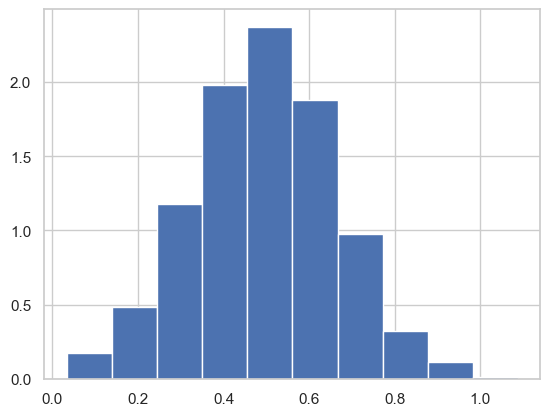

In [65]:
plt.hist((np.random.normal(loc=0, scale=1.0, size = 1000) - -3) / (3 - -3), density=True)
plt.show()

In [1]:
# Simulator

In [2]:
from env import simulator

In [3]:
env = simulator()

In [9]:
s, _ = env.reset()

# ['misconception_type', 'convo_turn','done','listen_to_feedback','problem_progress','progress_delta','correct_solution']
s

(2, 0, 0, 0, 0, 0, 0)

In [26]:
# "Focus": 0,
# "Probing": 1,
# "Telling": 2,
# "Generic": 3,
# self.action = [0,1,2,3]
a = 0
s, r, done, _, _ = env.step(a)
if done:
    env.reset()
s

(1, 3, 1, 0, 100, 90, 1)

In [25]:
s

(1, 2, 0, 0, 10, 0, 0)

In [14]:
r

np.int64(16)

In [13]:
# policy evaluation with Monte Carlo
def eval_policy(policy, env_name, seed, eval_episodes=10):
        eval_env = gym.make(env_name)
        eval_env.reset(seed=seed)
        avg_reward = 0.
        for _ in range(eval_episodes):
            state, _ = eval_env.reset()
            done = False
            step = 0
            while not done:
                action = policy.select_action(np.array(state))
                state, reward, terminated, truncated, _ = eval_env.step(action)
                avg_reward += reward
                step += 1
                done = terminated or truncated
        avg_reward /= eval_episodes

        print("---------------------------------------")
        print(f"Evaluation over {eval_episodes} episodes: {avg_reward:.3f}")
        print("---------------------------------------")
        return avg_reward